<a href="https://colab.research.google.com/github/ArthurMN/IC-TRAB-1/blob/main/IC_TRAB1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 2
Usando o conjunto de dados do aerogerador (variável de entrada: velocidade do vento – m/s, variável de saída: potência gerada – kWatts), determine os modelos de regressão polinomial (graus 2 a 7) com parâmetros estimados pelo método dos mínimos quadrados.

Avalie a qualidade de cada modelo pela métrica R2  e R2aj (equações 48 e 49, slides sobre Regressão Múltipla).


# Leitura dos dados

Para a leitura da base de dados foi utilizada a biblioteca pandas com auxilio da função readCsv. 

Após a leitura, o gráfico de dispersão é plotado utilizando a biblioteca matplotlib e seaborn.


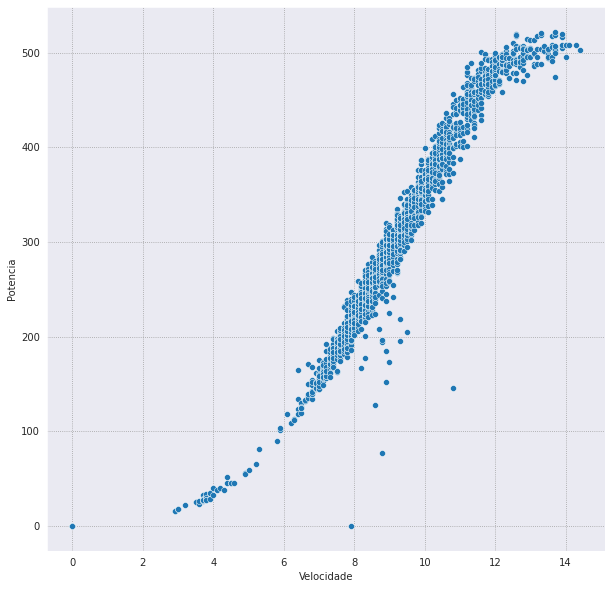

'----------- LEITURA DE DADOS, E GRÁFICO DE DISPERSÃO - FIM ---------------'

In [85]:
#Importação das bibliotecas utilizadas
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

"""----------- LEITURA DE DADOS, E GRÁFICO DE DISPERSÃO - INICIO ---------------"""
#Lendo os dados do aerogerador
dataBase = pd.read_csv('aerogerador.dat', sep='\t',header=None)
Size = len(dataBase[0]) #Tamanho da amostragem

#Dicionario com os dados de velocidade e potência
dic = {
    'Velocidade': dataBase[0],
    'Potencia': dataBase[1]
}
new_dataBase = pd.DataFrame(dic)

#Plotagem dos dados de dispersão
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(10, 10))
#Gráfico de Dispersão
graph = sns.scatterplot(x="Velocidade", y="Potencia", 
                    data=new_dataBase)
plt.show()
"""----------- LEITURA DE DADOS, E GRÁFICO DE DISPERSÃO - FIM ---------------"""

#Aplicando a regressão polinomial

O modelo de regressão polinomial se dara pela utilização do método de mínimos quadrados, uma técnica de otimização matemática que procura encontrar o melhor ajuste para um conjunto de dados tentando minimizar a soma dos quadrados das diferenças entre o valor estimado e os dados observados.

As seguintes equações serão utilizadas,

Vetores de estimativas:
\begin{align}
        \mathbf {\displaystyle \mathbf {\hat {β}}} = (X^TX)^{-1}X^Ty
    \end{align}
Modelo de predição:
\begin{align}
        \mathbf {\displaystyle \mathbf {\hat {y}}} = X{\displaystyle \mathbf {\hat {β}}}
    \end{align}
Vetor de resíduos:
\begin{align}
        \mathbf e = y - {\displaystyle \mathbf {\hat {y}}}
    \end{align}
Critério de avaliação:
\begin{align}
        \mathbf R^2 = 1 - \frac{SQ_E}{S_{yy}}
    \end{align}


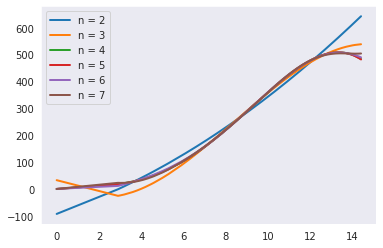

In [86]:
#Definindo as variáveis dependentes e independentes
a = dataBase[0]
b = dataBase[1]

#Função de cálculo da regressão polinomial
def Regressao_Polinomial(a,b,n):
    X = np.ones(Size)                
    for i in range(1,n+1):
        X = np.c_[X, a**i]
    indices = ((np.linalg.inv(X.T@X))@X.T)@b
    return indices


"""----------------- REGRESSÃO PARA ORDEM DE 2 A 7, E GRÁFICO DE PREDIÇÃO - INICIO ------------------------------"""
R2_backup = [] # vetor vazio para guardar os valores de cada R2 de n
R2_ajustado_backup = [] # vetor vazio para guardar os valores de cada R2_ajustado de n

for j in range(2,7+1):                      
    B = Regressao_Polinomial(a,b,j)
    b_pred = B[0]
    for i in range(1,j+1):
        b_pred += B[i] * a**i

    # Critérios de avaliação:
    SQE = ((b - b_pred)**2).sum()
    Syy = ((b - b.mean())**2).sum()
    R2   = 1 - SQE/Syy # Calcula R2
    R2_ajustado = 1 - (SQE/(Size - j - 1))/(Syy/(Size-1)) # Calcula R2_ajustado
    plt.plot(a, b_pred, lw=2, label = 'n = %i' %j)  
    R2_backup.append(R2) # Armazena R2
    R2_ajustado_backup.append(R2_ajustado) # Armazena R2_ajustado


plt.legend(fontsize=10)
plt.grid()
"""----------------- REGRESSÃO PARA ORDEM DE 2 A 7, E GRÁFICO DE PREDIÇÃO - FIM ------------------------------"""
plt.show()


# Avaliação da qualidade de cada modelo
Analisando o gráfico onde as curvas se sobrepõe, e também a tabela de valores de R2 e R2_ajustado é possível verificar que o modelo vai melhorando até chegar em n = 4, e apartir desse ponto não existem melhoras significativas.

In [87]:
df = {'R2': R2_backup, 'R2_ajustado': R2_ajustado_backup}
df = pd.DataFrame(data=df)
df

,R2,R2_ajustado
0,0.943424,0.943374
1,0.969023,0.968982
2,0.973724,0.973677
3,0.973726,0.973667
4,0.973761,0.973691
5,0.973857,0.973776


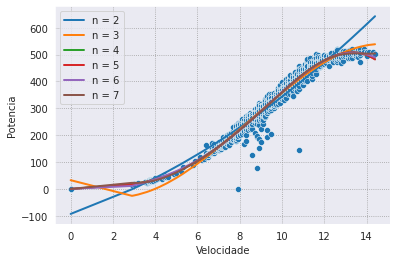

In [88]:
"""------- PREDIÇÕES SOBREPOSTAS SOBRE O GRÁFICO DE DISPERSÃO - INICIO ---------"""
#Plota os dados de dispersão
graph = sns.scatterplot(x="Velocidade", y="Potencia", 
                    data=new_dataBase)
for j in range(2,7+1):                      
    B = Regressao_Polinomial(a,b,j)
    b_pred = B[0]
    for i in range(1,j+1):
        b_pred += B[i] * a**i   

    # Critérios de avaliação:
    SQE = ((b - b_pred)**2).sum()
    Syy = ((b - b.mean())**2).sum()
    R2   = 1 - SQE/Syy # Calcula R2
    R2_adj = 1 - (SQE/(Size - j - 1))/(Syy/(Size-1)) # Calcula R2_adj
    plt.plot(a,b_pred,lw=2, label = 'n = %i' %j)  
    R2_backup.append(R2) # Armazenando os R2 de cada coeficiente
    R2_ajustado_backup.append(R2_ajustado) # Armazenando os R2_adj de cada coeficiente

plt.legend(fontsize=10)
"""------- PREDIÇÕES SOBREPOSTAS SOBRE O GRÁFICO DE DISPERSÃO - FIM ---------"""
plt.show()